# Load the libraries

In [1]:
import geopandas as gpd
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as spc

%matplotlib inline

# Load the tornado data

In [2]:
tornado_db = gpd.read_file('data/torn.shp')

# Extract the widths and convert from yards to meters

In [3]:
wids = tornado_db.ix[(tornado_db['mag']==5) & (tornado_db['yr']>1995) & (tornado_db['wid']>0),'wid'].values
wids = spc.yard * wids

# Create a plot for a weibull distribution with supplied parameters

In [4]:
x = np.linspace(0,max(wids),1000)
y = sps.weibull_min.pdf(x,1.10089,scale=616.6737,loc=1207.008)

# Plot normalized histogram (empirical data) against Weibull PDF

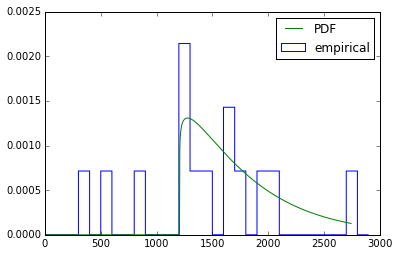

In [5]:
plt.hist(wids,bins=np.arange(0,3000,100),normed=True,histtype='step')
plt.plot(x,y)
plt.legend(['PDF','empirical'])

# As a reference, this is the distribution of mean(?) widths for EF-5 tornadoes prior to 1995, with the Brooks PDF included

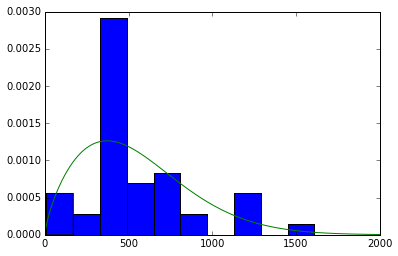

In [9]:
wids = tornado_db.ix[(tornado_db['mag']==5) & (tornado_db['yr']<1995) & (tornado_db['wid']>0),'wid'].values
wids = spc.yard * wids
x = np.linspace(0,2000,1000)
y = sps.weibull_min.pdf(x,1.71,scale=620.5,loc=0.0)
plt.hist(wids,normed=True)
plt.plot(x,y)